In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns

## Original Data is from Kaggle
https://www.kaggle.com/jboysen/mri-and-alzheimers?select=oasis_longitudinal.csv

# 1. EDA

In [2]:
train = pd.read_csv('data/oasis_longitudinal.csv')
train.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
# oasis_longitudinal
Group = 
- Nondemented  = negative
- Demented = positive
- converted
M/F = 성별
MR Delay = MR Delay Time 
Age
Educ = Education Level : Education years
SES = Socialize
MMSE = Mini Mental State Examination before
CDR = Clinical Dementia Rating score
eTIV = Estimated Total Intracranial Volume 
(Brain concern = nWBV, ASF)
nWBV = Normalize Whole Brain Volume
ASF = Brain Development Score

SyntaxError: invalid syntax (<ipython-input-3-fd127de6d590>, line 2)

In [4]:
train.corr()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Visit,1.000000,0.920009,0.183213,0.024615,-0.051622,-0.029078,0.002325,0.117428,-0.126682,-0.120399
MR Delay,0.920009,1.000000,0.205357,0.051630,-0.030813,0.065844,-0.062915,0.119624,-0.105586,-0.123545
Age,0.183213,0.205357,1.000000,-0.027886,-0.046857,0.055612,-0.026257,0.042348,-0.518359,-0.035067
EDUC,0.024615,0.051630,-0.027886,1.000000,-0.722647,0.194884,-0.153121,0.257015,-0.012200,-0.241752
SES,-0.051622,-0.030813,-0.046857,-0.722647,1.000000,-0.149219,0.076160,-0.261575,0.090095,0.255576
MMSE,-0.029078,0.065844,0.055612,0.194884,-0.149219,1.000000,-0.686519,-0.032084,0.341912,0.040052
CDR,0.002325,-0.062915,-0.026257,-0.153121,0.076160,-0.686519,1.000000,0.022819,-0.344819,-0.029340
eTIV,0.117428,0.119624,0.042348,0.257015,-0.261575,-0.032084,0.022819,1.000000,-0.210122,-0.988877
nWBV,-0.126682,-0.105586,-0.518359,-0.012200,0.090095,0.341912,-0.344819,-0.210122,1.000000,0.213476
ASF,-0.120399,-0.123545,-0.035067,-0.241752,0.255576,0.040052,-0.029340,-0.988877,0.213476,1.000000


In [5]:
train.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

## fill Nan in Train Data

In [6]:
# 
train.loc[train['SES'].isnull()]

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,R,73,16,NaN,27.0,1.0,1365,0.727,1.286
12,OAS2_0007,OAS2_0007_MR4,Demented,4,1281,M,R,75,16,NaN,27.0,1.0,1372,0.710,1.279
134,OAS2_0063,OAS2_0063_MR1,Demented,1,0,F,R,80,12,NaN,30.0,0.5,1430,0.737,1.228
135,OAS2_0063,OAS2_0063_MR2,Demented,2,490,F,R,81,12,NaN,27.0,0.5,1453,0.721,1.208
207,OAS2_0099,OAS2_0099_MR1,Demented,1,0,F,R,80,12,NaN,27.0,0.5,1475,0.762,1.190
208,OAS2_0099,OAS2_0099_MR2,Demented,2,807,F,R,83,12,NaN,23.0,0.5,1484,0.750,1.183


In [7]:
#
train['SES'].mean()

2.4604519774011298

In [8]:
train

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [9]:
train.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

# 2. Data Processing
## 2-1) fill Nan in SES  (1) Substitude mean based EDUC 

In [10]:
#find EDUC that null in SES
train[train['SES'].isnull()]['EDUC'].value_counts()

12    16
16     3
Name: EDUC, dtype: int64

In [11]:
train[(train['EDUC'] == 12)].mean()

Visit          1.834951
MR Delay     559.087379
Age           77.398058
EDUC          12.000000
SES            3.333333
MMSE          26.485149
CDR            0.378641
eTIV        1454.174757
nWBV           0.727369
ASF            1.219049
dtype: float64

In [12]:
train[(train['EDUC'] == 16)].mean()
#16은 2로 대체

Visit          1.888889
MR Delay     585.395062
Age           75.493827
EDUC          16.000000
SES            1.935897
MMSE          27.320988
CDR            0.277778
eTIV        1518.629630
nWBV           0.731444
ASF            1.174679
dtype: float64

In [13]:
t1 = train.copy()

In [14]:
t1.loc[(t1.SES.isnull()) & (t1.EDUC == 12),'SES'] = 3
t1.loc[(t1.SES.isnull()) & (t1.EDUC == 16),'SES'] = 2
t1.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          2
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [15]:
t1.loc[t1['Group'] == 'Nondemented', 'Group'] = 0
t1.loc[t1['Group'] == 'Demented', 'Group'] = 1
t1.loc[t1['Group'] == 'Converted', 'Group'] = 1
t1

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,0,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,M,R,75,12,3.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,M,R,76,12,3.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,M,R,80,12,3.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,1,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,1,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,0,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,0,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [16]:
t1

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,0,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,M,R,75,12,3.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,M,R,76,12,3.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,M,R,80,12,3.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,1,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,1,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,0,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,0,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [17]:
t1.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          2
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

## 2-2) (2) fill NaN in MMSE

In [18]:
t1.loc[t1['MMSE'].isnull()]

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
357,OAS2_0181,OAS2_0181_MR2,1,2,539,F,R,75,12,3.0,NaN,1.0,1169,0.742,1.501
358,OAS2_0181,OAS2_0181_MR3,1,3,1107,F,R,77,12,3.0,NaN,1.0,1159,0.733,1.515


In [19]:
t1.MMSE.mean()

27.342318059299192

## Correlation with MMSE & WBV↑

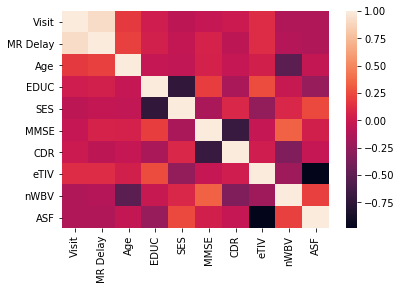

In [18]:
#MMSE = Mini Mental State Examination 이전에 검사 받은 횟수
sns.heatmap(t1.corr())

In [19]:
# 평균으로 대체
t1.loc[t1['MMSE'].isnull(), 'MMSE'] = 27
t1.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [20]:
t1.to_csv('C:/Users/Playdata/Desktop/t1.csv')

# 2-3) Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import sklearn as sk
for i in ['M/F', 'Hand','Group', 'MRI ID', 'CDR'] :
    encoder = LabelEncoder()
    encoder.fit(t1[i])
    t1[i] = encoder.transform(t1[i])
t1.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,0,0,1,0,1,0,87,14,2.0,27.0,0,1987,0.696,0.883
1,OAS2_0001,1,0,2,457,1,0,88,14,2.0,30.0,0,2004,0.681,0.876
2,OAS2_0002,2,1,1,0,1,0,75,12,3.0,23.0,1,1678,0.736,1.046
3,OAS2_0002,3,1,2,560,1,0,76,12,3.0,28.0,1,1738,0.713,1.010
4,OAS2_0002,4,1,3,1895,1,0,80,12,3.0,22.0,1,1698,0.701,1.034


#  StandardScaler

In [41]:
scaler = sk.preprocessing.StandardScaler()
y_train_case1= t1["Group"]
X_train_case1 = t1.drop(['Group', 'Subject ID', 'MRI ID', 'CDR'], axis = 1)

In [42]:
X_train_case1.head(3)

,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,1,0,1,0,87,14,2.0,27.0,1987,0.696,0.883
1,2,457,1,0,88,14,2.0,30.0,2004,0.681,0.876
2,1,0,1,0,75,12,3.0,23.0,1678,0.736,1.046


In [43]:
X_train_case1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Visit     373 non-null    int64  
 1   MR Delay  373 non-null    int64  
 2   M/F       373 non-null    int32  
 3   Hand      373 non-null    int32  
 4   Age       373 non-null    int64  
 5   EDUC      373 non-null    int64  
 6   SES       373 non-null    float64
 7   MMSE      373 non-null    float64
 8   eTIV      373 non-null    int64  
 9   nWBV      373 non-null    float64
 10  ASF       373 non-null    float64
dtypes: float64(4), int32(2), int64(5)
memory usage: 29.3 KB


In [44]:
scaler.fit(X_train_case1)
X_scale = scaler.transform(X_train_case1)
X_train_case1 = pd.DataFrame(data = X_scale, columns = list(X_train_case1.columns))

In [45]:
#X_train_case1 = pd.DataFrame(data = X_train_case1, columns = list(X_train_case1.columns))

In [46]:
X_train_case1

,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,-0.957067,-0.937715,1.153798,0.0,1.308738,-0.208132,-0.432559,-0.092813,2.836059,-0.905169,-2.265742
1,0.127997,-0.217613,1.153798,0.0,1.439787,-0.208132,-0.432559,0.724963,2.932703,-1.309643,-2.316501
2,-0.957067,-0.937715,1.153798,0.0,-0.263856,-0.904394,0.468807,-1.183181,1.079409,0.173429,-1.083784
3,0.127997,-0.055315,1.153798,0.0,-0.132806,-0.904394,0.468807,0.179779,1.420506,-0.446765,-1.344830
4,1.213060,2.048264,1.153798,0.0,0.391392,-0.904394,0.468807,-1.455772,1.193108,-0.770344,-1.170800
...,...,...,...,...,...,...,...,...,...,...,...
368,0.127997,0.389037,1.153798,0.0,0.653491,0.488130,-1.333925,0.179779,1.164683,-0.959099,-1.149046
369,1.213060,2.681702,1.153798,0.0,1.177688,0.488130,-1.333925,-0.365405,1.136259,-1.471432,-1.127292
370,-0.957067,-0.937715,-0.866703,0.0,-2.098548,-0.556263,-0.432559,0.724963,-0.961488,1.926149,0.982830
371,0.127997,0.264555,-0.866703,0.0,-1.836449,-0.556263,-0.432559,0.724963,-0.916009,1.791325,0.924820


In [47]:
# 데이터 를 로딩하고, 학습과 테스트 데이터 셋으로 분리
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_case1, y_train_case1, test_size=0.2, random_state=12)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
'''

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X_train_case1, y_train_case1, test_size=0.2, random_state=12)\nprint(X_train.shape)\nprint(X_test.shape)\nprint(y_train.shape)\nprint(y_test.shape)\n'

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier
dt_clf = DecisionTreeClassifier(random_state=156)

X_train , X_test , y_train , y_test = train_test_split(X_train_case1, y_train_case1,
                                                       test_size=0.2,  random_state=11)

# FIT DecisionTreeClassifer 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [49]:
target_names = ['Nondemented', 'Demented']

In [50]:
feature_names = list(X_train_case1.columns)
feature_names

['Visit',
 'MR Delay',
 'M/F',
 'Hand',
 'Age',
 'EDUC',
 'SES',
 'MMSE',
 'eTIV',
 'nWBV',
 'ASF']

# Make Tree

In [51]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=target_names  , \
feature_names = feature_names, impurity=True, filled=True)

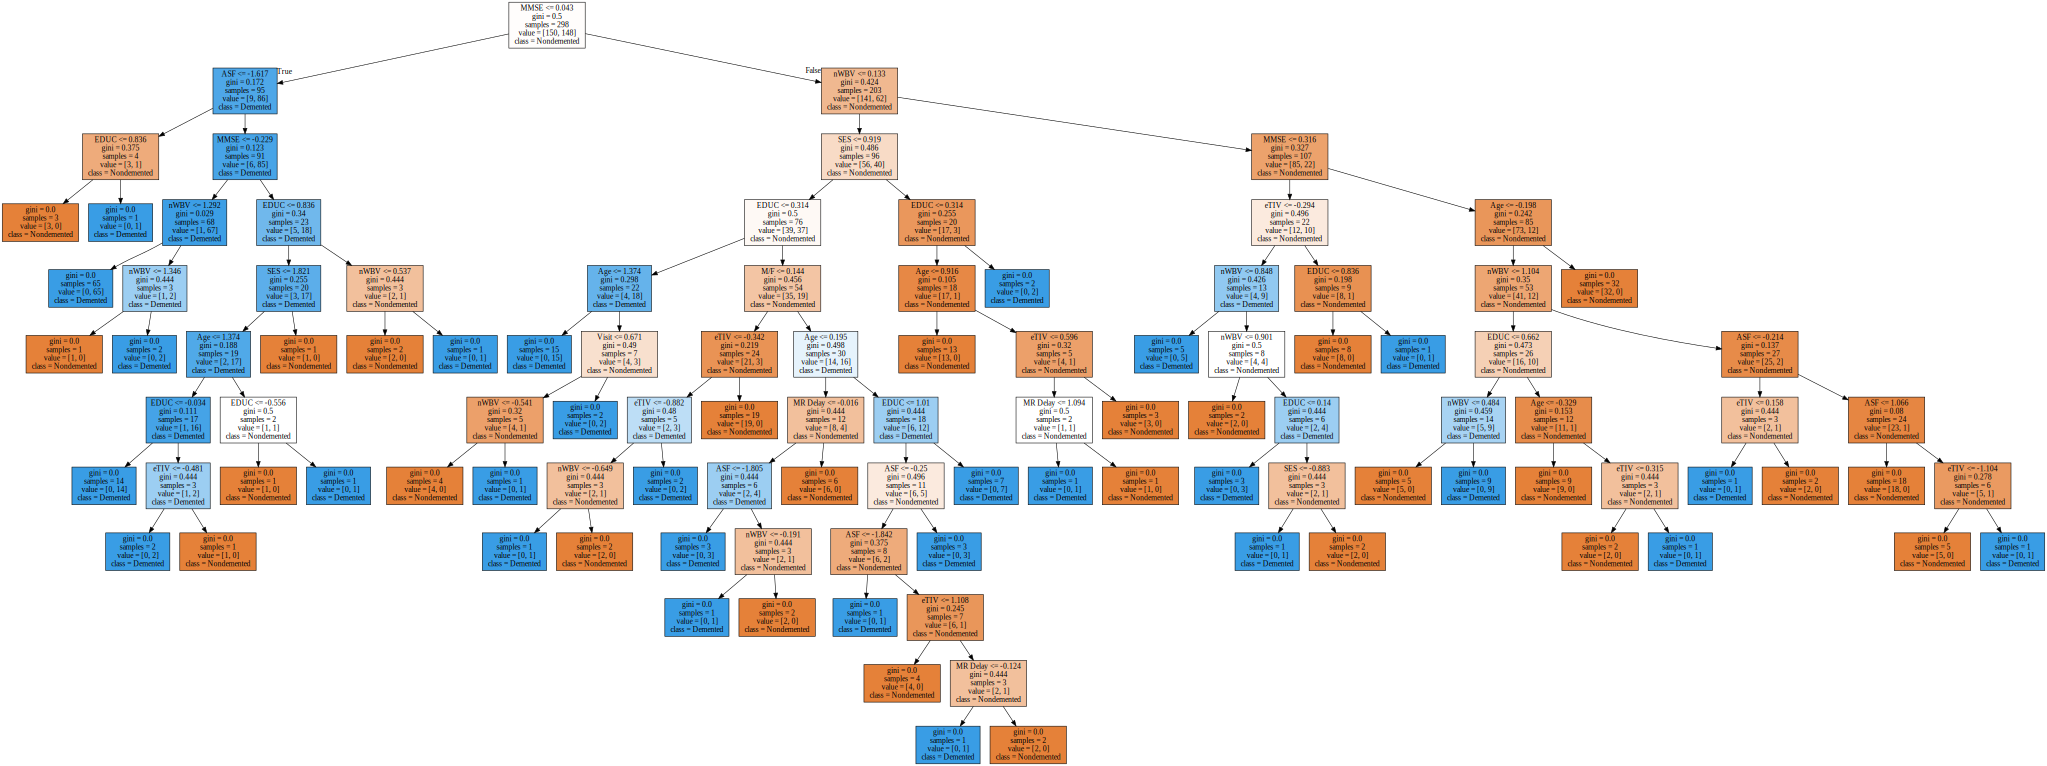

In [52]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.012 0.034 0.03  0.    0.055 0.162 0.043 0.345 0.095 0.161 0.063]
Visit : 0.012
MR Delay : 0.034
M/F : 0.030
Hand : 0.000
Age : 0.055
EDUC : 0.162
SES : 0.043
MMSE : 0.345
eTIV : 0.095
nWBV : 0.161
ASF : 0.063


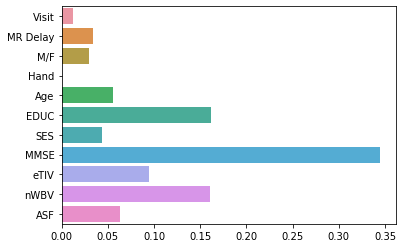

In [53]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=feature_names)

### 결정 트리(Decision TREE) 과적합(Overfitting)

In [54]:
X_train_case1['Age']

0      1.308738
1      1.439787
2     -0.263856
3     -0.132806
4      0.391392
         ...   
368    0.653491
369    1.177688
370   -2.098548
371   -1.836449
372   -1.574350
Name: Age, Length: 373, dtype: float64

In [57]:
y_labels = np.array(y_train_case1)
y_labels

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,

# Standard Scale without CDR

In [59]:
#scaler = sk.preprocessing.StandardScaler()
y_train_case1= t1["Group"]
X_train_case1 = t1.drop(['Group', 'Subject ID', 'MRI ID', 'CDR'], axis = 1)

In [60]:
X_train_case1

,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,1,0,1,0,87,14,2.0,27.0,1987,0.696,0.883
1,2,457,1,0,88,14,2.0,30.0,2004,0.681,0.876
2,1,0,1,0,75,12,3.0,23.0,1678,0.736,1.046
3,2,560,1,0,76,12,3.0,28.0,1738,0.713,1.010
4,3,1895,1,0,80,12,3.0,22.0,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...
368,2,842,1,0,82,16,1.0,28.0,1693,0.694,1.037
369,3,2297,1,0,86,16,1.0,26.0,1688,0.675,1.040
370,1,0,0,0,61,13,2.0,30.0,1319,0.801,1.331
371,2,763,0,0,63,13,2.0,30.0,1327,0.796,1.323


## make MMSE to %

In [61]:
t1.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,0,0,1,0,1,0,87,14,2.0,27.0,0,1987,0.696,0.883
1,OAS2_0001,1,0,2,457,1,0,88,14,2.0,30.0,0,2004,0.681,0.876
2,OAS2_0002,2,1,1,0,1,0,75,12,3.0,23.0,1,1678,0.736,1.046
3,OAS2_0002,3,1,2,560,1,0,76,12,3.0,28.0,1,1738,0.713,1.010
4,OAS2_0002,4,1,3,1895,1,0,80,12,3.0,22.0,1,1698,0.701,1.034


In [62]:
t1['MMSE'] = round(t1['MMSE'] / 30 *100, 2)

In [63]:
t1['nWBV'] = round(t1['nWBV'] *100, 2)

In [64]:
t1.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,0,0,1,0,1,0,87,14,2.0,90.00,0,1987,69.6,0.883
1,OAS2_0001,1,0,2,457,1,0,88,14,2.0,100.00,0,2004,68.1,0.876
2,OAS2_0002,2,1,1,0,1,0,75,12,3.0,76.67,1,1678,73.6,1.046
3,OAS2_0002,3,1,2,560,1,0,76,12,3.0,93.33,1,1738,71.3,1.010
4,OAS2_0002,4,1,3,1895,1,0,80,12,3.0,73.33,1,1698,70.1,1.034


## Encoding

In [65]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import sklearn as sk
for i in ['M/F', 'Hand','Group', 'MRI ID', 'CDR'] :
    encoder = LabelEncoder()
    encoder.fit(t1[i])
    t1[i] = encoder.transform(t1[i])
t1.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,0,0,1,0,1,0,87,14,2.0,90.00,0,1987,69.6,0.883
1,OAS2_0001,1,0,2,457,1,0,88,14,2.0,100.00,0,2004,68.1,0.876
2,OAS2_0002,2,1,1,0,1,0,75,12,3.0,76.67,1,1678,73.6,1.046
3,OAS2_0002,3,1,2,560,1,0,76,12,3.0,93.33,1,1738,71.3,1.010
4,OAS2_0002,4,1,3,1895,1,0,80,12,3.0,73.33,1,1698,70.1,1.034


In [66]:
y_train_case1= t1["Group"]
X_train_case1 = t1.drop(['Group', 'Group2', 'Subject ID', 'MRI ID', 'CDR'], axis = 1)

KeyError: "['Group2'] not found in axis"

In [67]:
X_train_case1

,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,1,0,1,0,87,14,2.0,27.0,1987,0.696,0.883
1,2,457,1,0,88,14,2.0,30.0,2004,0.681,0.876
2,1,0,1,0,75,12,3.0,23.0,1678,0.736,1.046
3,2,560,1,0,76,12,3.0,28.0,1738,0.713,1.010
4,3,1895,1,0,80,12,3.0,22.0,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...
368,2,842,1,0,82,16,1.0,28.0,1693,0.694,1.037
369,3,2297,1,0,86,16,1.0,26.0,1688,0.675,1.040
370,1,0,0,0,61,13,2.0,30.0,1319,0.801,1.331
371,2,763,0,0,63,13,2.0,30.0,1327,0.796,1.323


In [68]:
scaler.fit(X_train_case1)
X_scale = scaler.transform(X_train_case1)
X_train_case1 = pd.DataFrame(data = X_scale, columns = list(X_train_case1.columns))

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Generate DecisionTree Classifier
dt_clf = DecisionTreeClassifier(random_state=156)

X_train , X_test , y_train , y_test = train_test_split(X_train_case1, y_train_case1,
                                                       test_size=0.2,  random_state=11)

# FIT DecisionTreeClassifer 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [70]:
feature_names = list(X_train_case1.columns)
feature_names

['Visit',
 'MR Delay',
 'M/F',
 'Hand',
 'Age',
 'EDUC',
 'SES',
 'MMSE',
 'eTIV',
 'nWBV',
 'ASF']

# remake Tree

In [71]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=target_names  , \
feature_names = feature_names, impurity=True, filled=True)

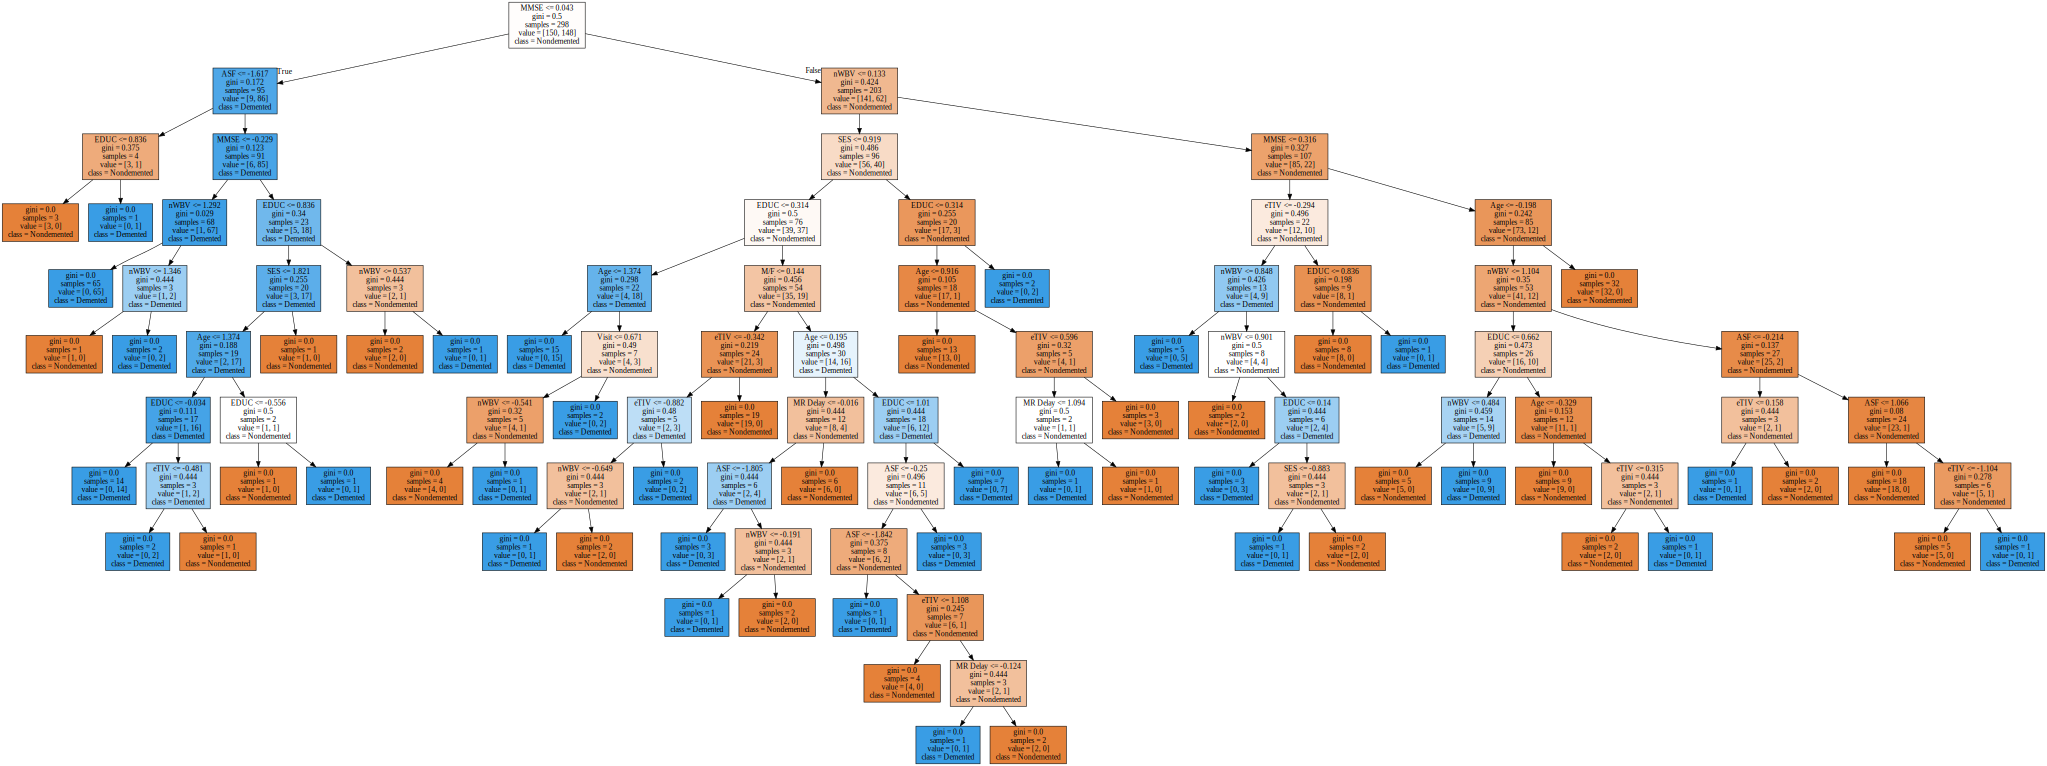

In [72]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.012 0.034 0.03  0.    0.055 0.162 0.043 0.345 0.095 0.161 0.063]
Visit : 0.012
MR Delay : 0.034
M/F : 0.030
Hand : 0.000
Age : 0.055
EDUC : 0.162
SES : 0.043
MMSE : 0.345
eTIV : 0.095
nWBV : 0.161
ASF : 0.063


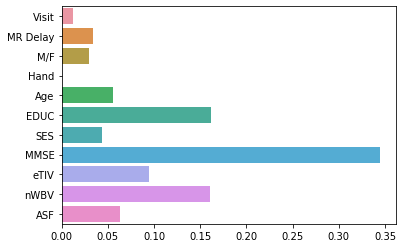

In [73]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=feature_names)

In [74]:
X_features = np.array(X_train_case1[['MMSE', 'nWBV']])
X_features

array([[-0.0928128 , -0.90516867],
       [ 0.72496299, -1.30964265],
       [-1.18318052,  0.17342861],
       [ 0.17977913, -0.44676482],
       [-1.45577245, -0.77034401],
       [ 0.17977913, -0.52765962],
       [-0.0928128 , -0.31194016],
       [ 0.17977913, -0.47372976],
       [ 0.45237106, -0.50069469],
       [ 0.72496299, -0.66248428],
       [ 0.17977913,  0.49700779],
       [-0.0928128 , -0.06925578],
       [-0.0928128 , -0.52765962],
       [ 0.72496299, -0.8512388 ],
       [ 0.45237106, -0.71641414],
       [-0.0928128 ,  2.06097385],
       [-0.91058859,  1.65649987],
       [ 0.72496299,  1.06327136],
       [ 0.45237106,  0.60486752],
       [ 0.45237106,  0.49700779],
       [ 0.45237106,  0.22735847],
       [ 0.45237106, -0.31194016],
       [ 0.72496299, -0.39283496],
       [ 0.72496299, -0.2580103 ],
       [ 0.45237106, -0.52765962],
       [-1.72836438, -0.87820374],
       [-3.09132403, -0.90516867],
       [-0.63799666, -1.87590622],
       [-1.18318052,

# Visualize Result By Scatter Plot

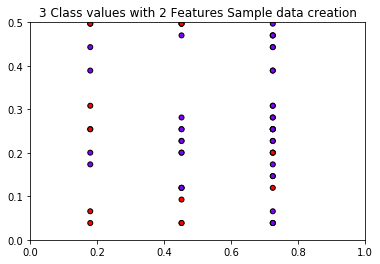

In [75]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
#X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                          #   n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.xlim(0, 1)
plt.ylim(0,0.5)
scatter = plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [76]:
X_features

array([[-0.0928128 , -0.90516867],
       [ 0.72496299, -1.30964265],
       [-1.18318052,  0.17342861],
       [ 0.17977913, -0.44676482],
       [-1.45577245, -0.77034401],
       [ 0.17977913, -0.52765962],
       [-0.0928128 , -0.31194016],
       [ 0.17977913, -0.47372976],
       [ 0.45237106, -0.50069469],
       [ 0.72496299, -0.66248428],
       [ 0.17977913,  0.49700779],
       [-0.0928128 , -0.06925578],
       [-0.0928128 , -0.52765962],
       [ 0.72496299, -0.8512388 ],
       [ 0.45237106, -0.71641414],
       [-0.0928128 ,  2.06097385],
       [-0.91058859,  1.65649987],
       [ 0.72496299,  1.06327136],
       [ 0.45237106,  0.60486752],
       [ 0.45237106,  0.49700779],
       [ 0.45237106,  0.22735847],
       [ 0.45237106, -0.31194016],
       [ 0.72496299, -0.39283496],
       [ 0.72496299, -0.2580103 ],
       [ 0.45237106, -0.52765962],
       [-1.72836438, -0.87820374],
       [-3.09132403, -0.90516867],
       [-0.63799666, -1.87590622],
       [-1.18318052,

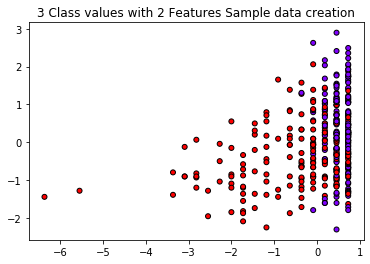

In [77]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
#X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                          #   n_classes=3, n_clusters_per_class=1,random_state=0)
# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 

scatter = plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

## hard to classify -> set xlim , ylim

In [78]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

In [79]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    ax.set_xlim(0, 0.5)
    ax.set_ylim(0, 0.5)
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

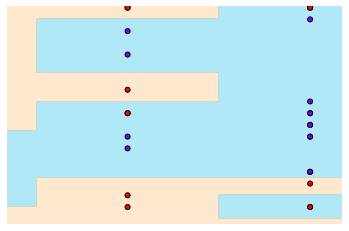

In [80]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

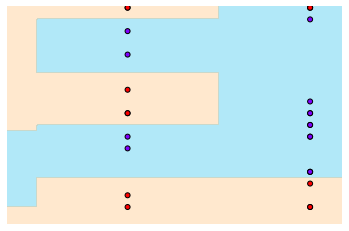

In [81]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=2).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [82]:
from sklearn.metrics import accuracy_score

# SVM Accuracy

In [84]:
from sklearn.linear_model import LogisticRegression 
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier #
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix 

In [85]:
# radial - SVM

model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(X_train, y_train)
prediction1=model.predict(X_test)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,y_test))

Accuracy for rbf SVM is  0.8666666666666667


In [86]:
# Linear SVM

model=svm.SVC(kernel='linear',C=1,gamma=0.1)
model.fit(X_train, y_train)
prediction2=model.predict(X_test)
print('Accuracy for linear SVM is ',metrics.accuracy_score(prediction1,y_test))

Accuracy for linear SVM is  0.8666666666666667


In [89]:
# Decision tree

model=DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction3=model.predict(X_test)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction3, y_test))

The accuracy of the Decision Tree is 0.8266666666666667


In [108]:
# Logistic Regression
lr_clf=LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print("LogisticRegression Classfier 정확도 : {}".format(accuracy_score(y_test, lr_pred)))

LogisticRegression Classfier 정확도 : 0.92


In [91]:
# KNN 군집분석

model=KNeighborsClassifier() 
model.fit(X_train, y_train)
prediction4=model.predict(X_test)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction4, y_test))

The accuracy of the KNN is 0.7333333333333333


In [93]:
# Gaussian Naive Bayes

model=GaussianNB()
model.fit(X_train, y_train)
prediction5=model.predict(X_test)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction5, y_test))

The accuracy of the NaiveBayes is 0.8933333333333333


In [94]:
# Random forest

model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, y_train)
prediction6 = model.predict(X_test)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction6, y_test))

The accuracy of the Random Forests is 0.9066666666666666


# 6. Cross Validation

In [96]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
import warnings         # warnings : 버전 충돌 및 특정 예외 처리를 위해 불러온 내장 모듈
warnings.filterwarnings("ignore", category=RuntimeWarning)

kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz = []
accuracy = []
std = []

classifiers = ['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']

models = [svm.SVC(kernel = 'linear'),svm.SVC(kernel = 'rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model,X_train_case1,y_train_case1, cv = kfold, scoring = "accuracy")
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.776956,0.132152
Radial Svm,0.718065,0.084121
Logistic Regression,0.787482,0.127650
KNN,0.680583,0.104899
Decision Tree,0.651138,0.103021
Naive Bayes,0.768990,0.117242
Random Forest,0.744879,0.117078


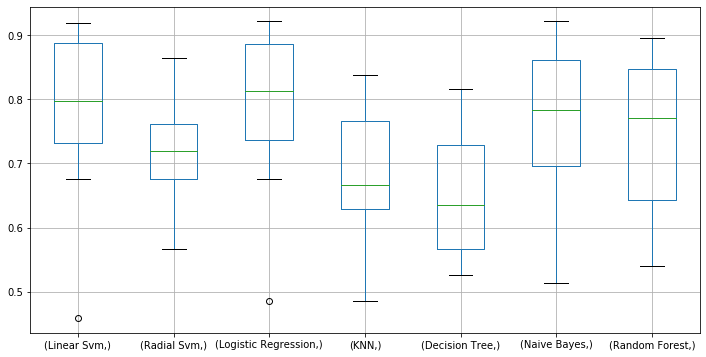

In [97]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

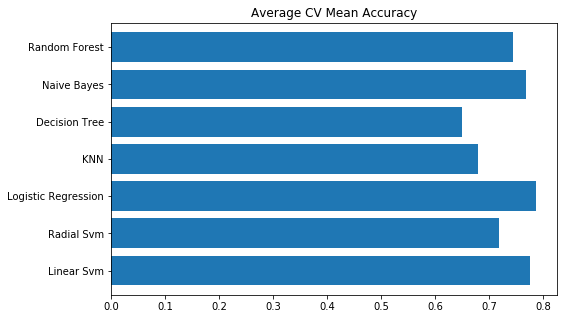

In [98]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

# *GridSearchCV k-fold, parameter tuning*

In [105]:
# SVM
#Linear 
from sklearn.model_selection import GridSearchCV

C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}
gd = GridSearchCV(estimator = svm.SVC(), param_grid = hyper, verbose = True)
gd.fit(X_train_case1, y_train_case1)
print(gd.best_score_)
print(gd.best_estimator_)

# C = 0.05 , gamma = 0.1 일 때, 베스트.

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.788
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    3.1s finished


#### * Logistic Regression**


In [115]:
parameters_lr = {"C" : np.logspace(0, 4, 10),
"penalty" : ["l1", "l2"]}

gd = GridSearchCV(lr_clf, param_grid=parameters_lr, scoring='accuracy', cv=20)
gd.fit(X_train_case1, y_train_case1)

print('GridSearchCV 최적 하이퍼 파라미터 :', gd.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(gd.best_score_))
best_lrlf = gd. best_estimator_

dpredictions_lr = best_lrlf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions_lr)
print('Tuning 후 LogisticRegression 정확도 : {0:.4f}'.format(accuracy))


GridSearchCV 최적 하이퍼 파라미터 : {'C': 2.7825594022071245, 'penalty': 'l2'}
GridSearchCV 최고 정확도: 0.7953
Tuning 후 LogisticRegression 정확도 : 0.9200
